# Final Project Code:
## Neural Networks + feature selection/regularization

Using SDI and EJI Index, output is F_ASTHMA (EJI)
* "F_ASTHMA" is a flag indicating tracts greater than 0.6666 percentile rank with asthma, values are 0 or 1

* Feature selection / regularization
    * PCA + MLPClassifier (since doesn't have own feature selection)
    * Tensor flow - does have feature selection embedded

In [400]:
import csv
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot

In [401]:
# EJI data, read in CSV
EJI_data = pd.read_csv('United States.csv')

print(EJI_data.shape)
print(EJI_data.columns)
print(EJI_data.head(5))

(72333, 118)
Index(['STATEFP', 'COUNTYFP', 'TRACTCE', 'AFFGEOID', 'GEOID', 'NAME', 'COUNTY',
       'StateAbbr', 'StateDesc', 'Location',
       ...
       'EP_BPHIGH', 'EP_ASTHMA', 'EP_CANCER', 'EP_MHLTH', 'EP_DIABETES',
       'EPL_BPHIGH', 'EPL_ASTHMA', 'EPL_CANCER', 'EPL_DIABETES', 'EPL_MHLTH'],
      dtype='object', length=118)
   STATEFP  COUNTYFP  TRACTCE              AFFGEOID       GEOID   NAME  \
0        1         1    20100  1400000US01001020100  1001020100  201.0   
1        1         1    20200  1400000US01001020200  1001020200  202.0   
2        1         1    20300  1400000US01001020300  1001020300  203.0   
3        1         1    20400  1400000US01001020400  1001020400  204.0   
4        1         1    20500  1400000US01001020500  1001020500  205.0   

    COUNTY StateAbbr StateDesc                                   Location  \
0  Autauga        AL   Alabama  Census Tract 201, Autauga County, Alabama   
1  Autauga        AL   Alabama  Census Tract 202, Autauga County, 

In [402]:
# SDI data, read in CSV -- census level!
SDI_data = pd.read_csv('rgcsdi-2015-2019-censustract.csv')

print(SDI_data.head(5))
print(SDI_data.shape)

   CENSUSTRACT_FIPS  CensusTract_population  SDI_score  \
0        1001020100                    1993       52.0   
1        1001020200                    1959       74.0   
2        1001020300                    3507       71.0   
3        1001020400                    3878       22.0   
4        1001020500                   10596       59.0   

   PovertyLT100_FPL_score  Single_Parent_Fam_score  Education_LT12years_score  \
0                    71.0                     50.0                       64.0   
1                    77.0                     26.0                       71.0   
2                    73.0                     68.0                       71.0   
3                    18.0                     33.0                       44.0   
4                    67.0                     42.0                       43.0   

   HHNo_Vehicle_score  HHRenter_Occupied_score  HHCrowding_score  \
0                11.0                     38.0               1.0   
1                86.0       

In [403]:
# Find values in EJI_data['GEOID'] that are not in SDI_data['CENSUSTRACT_FIPS']

EJI_values_not_in_SDI = EJI_data['GEOID'][~EJI_data['GEOID'].
                                                  isin(SDI_data['CENSUSTRACT_FIPS'])]

# Finding values in SDIdata['CENSUSTRACT_FIPS'] that are not in EJIdata['GEOID']
SDI_values_not_in_EJI = SDI_data['CENSUSTRACT_FIPS'][~SDI_data['CENSUSTRACT_FIPS'].
                                                             isin(EJI_data['GEOID'])]

# Print the results
print("Values in GEOID but not in CENSUSTRACT_FIPS:",EJI_values_not_in_SDI.tolist())
print(len(EJI_values_not_in_SDI))

print("Values in CENSUSTRACT_FIPS but not in GEOID:",SDI_values_not_in_EJI.tolist())
print(len(SDI_values_not_in_EJI))


Values in GEOID but not in CENSUSTRACT_FIPS: [11001000100, 11001000701, 11001000801, 11001000901, 11001001001, 11001001302, 11001002502, 11001002701, 11001003700, 11001003800, 11001003900, 11001004400, 11001004701, 11001005002, 11001005201, 11001005301, 11001005500, 11001005600, 11001005800, 11001006202, 11001007200, 11001009501, 11001010200, 11001010600, 11001011000]
25
Values in CENSUSTRACT_FIPS but not in GEOID: [1003990000, 2013000100, 2016000100, 2016000200, 2020000101, 2020000102, 2020000201, 2020000202, 2020000203, 2020000204, 2020000300, 2020000400, 2020000500, 2020000600, 2020000701, 2020000702, 2020000703, 2020000801, 2020000802, 2020000901, 2020000902, 2020001000, 2020001100, 2020001200, 2020001300, 2020001400, 2020001500, 2020001601, 2020001602, 2020001701, 2020001702, 2020001731, 2020001732, 2020001801, 2020001802, 2020001900, 2020002000, 2020002100, 2020002201, 2020002202, 2020002301, 2020002302, 2020002303, 2020002400, 2020002501, 2020002502, 2020002601, 2020002602, 2020

In [404]:
# Drop asthma related columns from EJI
EJI_data.drop("EP_ASTHMA", axis=1, inplace=True)
EJI_data.drop("EPL_ASTHMA", axis=1, inplace=True)

EJI_data.drop(["F_HVM", "RPL_HVM", "SPL_EJI","RPL_EJI"], axis=1, inplace=True)
print(EJI_data.head())

   STATEFP  COUNTYFP  TRACTCE              AFFGEOID       GEOID   NAME  \
0        1         1    20100  1400000US01001020100  1001020100  201.0   
1        1         1    20200  1400000US01001020200  1001020200  202.0   
2        1         1    20300  1400000US01001020300  1001020300  203.0   
3        1         1    20400  1400000US01001020400  1001020400  204.0   
4        1         1    20500  1400000US01001020500  1001020500  205.0   

    COUNTY StateAbbr StateDesc                                   Location  \
0  Autauga        AL   Alabama  Census Tract 201, Autauga County, Alabama   
1  Autauga        AL   Alabama  Census Tract 202, Autauga County, Alabama   
2  Autauga        AL   Alabama  Census Tract 203, Autauga County, Alabama   
3  Autauga        AL   Alabama  Census Tract 204, Autauga County, Alabama   
4  Autauga        AL   Alabama  Census Tract 205, Autauga County, Alabama   

   ...  EP_MOBILE  EP_GROUPQ  EP_BPHIGH  EP_CANCER  EP_MHLTH  EP_DIABETES  \
0  ...       17

In [405]:
# Just looking at missing data in the unmerged
# SDI and EJI datasets
EJI_missing = EJI_data.isnull().sum()
#print(f"EJI Missing: {EJI_missing}")
print("EJI cols missing values:\n",EJI_missing[EJI_missing > 0], "\n")


SDI_missing = SDI_data.isnull().sum()
#print(f"\nSDI Missing: {SDI_missing}")
print("SDI cols missing values:\n",SDI_missing[SDI_missing > 0], "\n")

EJI cols missing values:
 StateAbbr       480
SPL_SER         609
RPL_SER         609
EPL_OZONE        74
EPL_PM           74
               ... 
EP_DIABETES     480
EPL_BPHIGH      480
EPL_CANCER      480
EPL_DIABETES    480
EPL_MHLTH       480
Length: 78, dtype: int64 

SDI cols missing values:
 SDI_score                    646
PovertyLT100_FPL_score       646
Single_Parent_Fam_score      646
Education_LT12years_score    646
HHNo_Vehicle_score           646
HHRenter_Occupied_score      646
HHCrowding_score             646
Nonemployed_score            646
sdi                          646
dtype: int64 



In [406]:
# Remove EJI missing data ...
    # Could try to impute w/ nearest neighbors but not neccesary
EJI_clean_df = EJI_data.dropna()
print(EJI_clean_df.shape)
print(EJI_clean_df)

EJI_missing_clean = EJI_clean_df.isnull().sum()
print("\nEJI cols missing values:\n",EJI_missing_clean[EJI_missing_clean > 0], "\n")

(71677, 112)
       STATEFP  COUNTYFP  TRACTCE              AFFGEOID        GEOID     NAME  \
0            1         1    20100  1400000US01001020100   1001020100   201.00   
1            1         1    20200  1400000US01001020200   1001020200   202.00   
2            1         1    20300  1400000US01001020300   1001020300   203.00   
3            1         1    20400  1400000US01001020400   1001020400   204.00   
4            1         1    20500  1400000US01001020500   1001020500   205.00   
...        ...       ...      ...                   ...          ...      ...   
72328       56        43      200  1400000US56043000200  56043000200     2.00   
72329       56        43      301  1400000US56043000301  56043000301     3.01   
72330       56        43      302  1400000US56043000302  56043000302     3.02   
72331       56        45   951100  1400000US56045951100  56045951100  9511.00   
72332       56        45   951300  1400000US56045951300  56045951300  9513.00   

         COUNT

# Merge SDI and EJI data

In [407]:
# Merge data frames, on CENSUSTRACTS_FIP and GEOID

# Ensure same type
EJI_clean_df['GEOID'] = EJI_clean_df['GEOID'].astype(str).str.strip()
SDI_data['CENSUSTRACT_FIPS'] = SDI_data['CENSUSTRACT_FIPS'].astype(str).str.strip()

# MERGE!
merged_df = pd.merge(
    EJI_clean_df, 
    SDI_data, 
    left_on='GEOID', 
    right_on='CENSUSTRACT_FIPS', 
    how='left') 
# left join BC don't need the 723 values in SDI data
# that don't match up with GEOIDs (prof said in email)

print(merged_df.head())
print(len(merged_df))

<ipython-input-407-41196719fd2f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  EJI_clean_df['GEOID'] = EJI_clean_df['GEOID'].astype(str).str.strip()


   STATEFP  COUNTYFP  TRACTCE              AFFGEOID       GEOID   NAME  \
0        1         1    20100  1400000US01001020100  1001020100  201.0   
1        1         1    20200  1400000US01001020200  1001020200  202.0   
2        1         1    20300  1400000US01001020300  1001020300  203.0   
3        1         1    20400  1400000US01001020400  1001020400  204.0   
4        1         1    20500  1400000US01001020500  1001020500  205.0   

    COUNTY StateAbbr StateDesc                                   Location  \
0  Autauga        AL   Alabama  Census Tract 201, Autauga County, Alabama   
1  Autauga        AL   Alabama  Census Tract 202, Autauga County, Alabama   
2  Autauga        AL   Alabama  Census Tract 203, Autauga County, Alabama   
3  Autauga        AL   Alabama  Census Tract 204, Autauga County, Alabama   
4  Autauga        AL   Alabama  Census Tract 205, Autauga County, Alabama   

   ...  HHCrowding_score  Nonemployed_score       sdi  pct_Poverty_LT100  \
0  ...          

In [408]:
# Reorganize columns
merged_df.insert(5, 'CENSUSTRACT_FIPS', merged_df.pop('CENSUSTRACT_FIPS'))
merged_df.insert(6, 'CensusTract_population', merged_df.pop('CensusTract_population'))

# Print list of columns
print(merged_df.columns.tolist())

print(merged_df['GEOID'].head())
print(merged_df['CENSUSTRACT_FIPS'].head())

['STATEFP', 'COUNTYFP', 'TRACTCE', 'AFFGEOID', 'GEOID', 'CENSUSTRACT_FIPS', 'CensusTract_population', 'NAME', 'COUNTY', 'StateAbbr', 'StateDesc', 'Location', 'E_TOTPOP', 'M_TOTPOP', 'E_DAYPOP', 'SPL_SER', 'RPL_SER', 'EPL_OZONE', 'EPL_PM', 'EPL_DSLPM', 'EPL_TOTCR', 'SPL_EBM_THEME1', 'RPL_EBM_DOM1', 'EPL_NPL', 'EPL_TRI', 'EPL_TSD', 'EPL_RMP', 'EPL_COAL', 'EPL_LEAD', 'SPL_EBM_THEME2', 'RPL_EBM_DOM2', 'EPL_PARK', 'EPL_HOUAGE', 'EPL_WLKIND', 'SPL_EBM_THEME3', 'RPL_EBM_DOM3', 'EPL_RAIL', 'EPL_ROAD', 'EPL_AIRPRT', 'SPL_EBM_THEME4', 'RPL_EBM_DOM4', 'EPL_IMPWTR', 'SPL_EBM_THEME5', 'RPL_EBM_DOM5', 'SPL_EBM', 'RPL_EBM', 'EPL_MINRTY', 'SPL_SVM_DOM1', 'RPL_SVM_DOM1', 'EPL_POV200', 'EPL_NOHSDP', 'EPL_UNEMP', 'EPL_RENTER', 'EPL_HOUBDN', 'EPL_UNINSUR', 'EPL_NOINT', 'SPL_SVM_DOM2', 'RPL_SVM_DOM2', 'EPL_AGE65', 'EPL_AGE17', 'EPL_DISABL', 'EPL_LIMENG', 'SPL_SVM_DOM3', 'RPL_SVM_DOM3', 'EPL_MOBILE', 'EPL_GROUPQ', 'SPL_SVM_DOM4', 'RPL_SVM_DOM4', 'SPL_SVM', 'RPL_SVM', 'F_BPHIGH', 'F_ASTHMA', 'F_CANCER', 'F_M

In [409]:
merged_df

,STATEFP,COUNTYFP,TRACTCE,AFFGEOID,GEOID,CENSUSTRACT_FIPS,CensusTract_population,NAME,COUNTY,StateAbbr,...,HHCrowding_score,Nonemployed_score,sdi,pct_Poverty_LT100,pct_Single_Parent_Fam,pct_Education_LT12years,pct_NonEmployed,pctHH_No_Vehicle,pctHH_Renter_Occupied,pctHH_Crowding
0,1,1,20100,1400000US01001020100,1001020100,1001020100,1993.0,201.00,Autauga,AL,...,1.0,74.0,0.019577,0.166583,0.116402,0.125472,0.454829,0.009873,0.236953,0.000000
1,1,1,20200,1400000US01001020200,1001020200,1001020200,1959.0,202.00,Autauga,AL,...,44.0,96.0,0.716664,0.191340,0.071618,0.148254,0.779101,0.142442,0.373547,0.015988
2,1,1,20300,1400000US01001020300,1001020300,1001020300,3507.0,203.00,Autauga,AL,...,61.0,44.0,0.594259,0.172512,0.160775,0.149701,0.332575,0.046324,0.353676,0.027941
3,1,1,20400,1400000US01001020400,1001020400,1001020400,3878.0,204.00,Autauga,AL,...,27.0,65.0,-0.867549,0.046416,0.085202,0.081583,0.411869,0.012537,0.208955,0.007164
4,1,1,20500,1400000US01001020500,1001020500,1001020500,10596.0,205.00,Autauga,AL,...,21.0,31.0,0.211409,0.151626,0.100202,0.079653,0.292953,0.044390,0.516841,0.004684
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71672,56,43,200,1400000US56043000200,56043000200,56043000200,3051.0,2.00,Washakie,WY,...,67.0,79.0,-0.473180,0.081578,0.061140,0.088378,0.490253,0.022013,0.177673,0.033805
71673,56,43,301,1400000US56043000301,56043000301,56043000301,2482.0,3.01,Washakie,WY,...,44.0,5.0,0.145855,0.085726,0.228070,0.139634,0.193894,0.087611,0.318584,0.015929
71674,56,43,302,1400000US56043000302,56043000302,56043000302,2494.0,3.02,Washakie,WY,...,28.0,66.0,-0.125254,0.153465,0.056761,0.084601,0.413064,0.038422,0.212876,0.007269
71675,56,45,951100,1400000US56045951100,56045951100,56045951100,3294.0,9511.00,Weston,WY,...,49.0,83.0,-0.112173,0.171240,0.103743,0.066023,0.521434,0.023392,0.150585,0.019006


In [410]:
# Check for missing values in the entire dataset
# Display columns with missing values

merged_missing = merged_df.isnull().sum()
print("Columns in merged_df with missing values:\n",merged_missing[merged_missing > 0], "\n")

Columns in merged_df with missing values:
 CENSUSTRACT_FIPS             24
CensusTract_population       24
SDI_score                    24
PovertyLT100_FPL_score       24
Single_Parent_Fam_score      24
Education_LT12years_score    24
HHNo_Vehicle_score           24
HHRenter_Occupied_score      24
HHCrowding_score             24
Nonemployed_score            24
sdi                          24
pct_Poverty_LT100            24
pct_Single_Parent_Fam        24
pct_Education_LT12years      24
pct_NonEmployed              24
pctHH_No_Vehicle             24
pctHH_Renter_Occupied        24
pctHH_Crowding               24
dtype: int64 



In [411]:
merged_df.drop(['CENSUSTRACT_FIPS', 'CensusTract_population'], axis=1, inplace=True)
print(merged_df)

       STATEFP  COUNTYFP  TRACTCE              AFFGEOID        GEOID     NAME  \
0            1         1    20100  1400000US01001020100   1001020100   201.00   
1            1         1    20200  1400000US01001020200   1001020200   202.00   
2            1         1    20300  1400000US01001020300   1001020300   203.00   
3            1         1    20400  1400000US01001020400   1001020400   204.00   
4            1         1    20500  1400000US01001020500   1001020500   205.00   
...        ...       ...      ...                   ...          ...      ...   
71672       56        43      200  1400000US56043000200  56043000200     2.00   
71673       56        43      301  1400000US56043000301  56043000301     3.01   
71674       56        43      302  1400000US56043000302  56043000302     3.02   
71675       56        45   951100  1400000US56045951100  56045951100  9511.00   
71676       56        45   951300  1400000US56045951300  56045951300  9513.00   

         COUNTY StateAbbr S

# Geographical Imputations

Just need to impute data for the 25 DC missing ones!

In [412]:
# Verifying missing values are in merged_df, 
# with geographic info
EJI_list = EJI_values_not_in_SDI.tolist()
print(EJI_list)

str_EJI_list = [str(item) for item in EJI_values_not_in_SDI]
print(str_EJI_list)

missing_dc_rows = merged_df[merged_df['GEOID'].isin(str_EJI_list)]
print(missing_dc_rows)

[11001000100, 11001000701, 11001000801, 11001000901, 11001001001, 11001001302, 11001002502, 11001002701, 11001003700, 11001003800, 11001003900, 11001004400, 11001004701, 11001005002, 11001005201, 11001005301, 11001005500, 11001005600, 11001005800, 11001006202, 11001007200, 11001009501, 11001010200, 11001010600, 11001011000]
['11001000100', '11001000701', '11001000801', '11001000901', '11001001001', '11001001302', '11001002502', '11001002701', '11001003700', '11001003800', '11001003900', '11001004400', '11001004701', '11001005002', '11001005201', '11001005301', '11001005500', '11001005600', '11001005800', '11001006202', '11001007200', '11001009501', '11001010200', '11001010600', '11001011000']
       STATEFP  COUNTYFP  TRACTCE              AFFGEOID        GEOID    NAME  \
13618       11         1      100  1400000US11001000100  11001000100    1.00   
13625       11         1      701  1400000US11001000701  11001000701    7.01   
13627       11         1      801  1400000US11001000801  1

In [413]:
import censusdata

# Need to find the 25 missing in merged_df

# Function from Week 11 Outline
def get_state_county_info(tract):
    # Ensure the tract is treated as a string for slicing
    tract = str(tract)
    state_fips = tract[:2]
    county_fips = tract[2:5]

    try:
        # Retrieve state name
        state_info = censusdata.geographies(
            censusdata.censusgeo([('state', state_fips)]),
            'acs5', 2021
        )
        state_name = list(state_info.keys())[0] if state_info else 'UnknownState'

        # Retrieve county name
        county_info = censusdata.geographies(
            censusdata.censusgeo([('state', state_fips), 
                                  ('county', county_fips)]), 'acs5', 2021
        )
        county_name = list(county_info.keys())[0] if county_info else 'UnknownCounty'
        
        return {
            'tract': tract,
            'state': state_name,
            'county': county_name
        }
    except Exception as e:
        return {
            'tract': tract,
            'state': 'Error',
            'county': 'Error',
            'error': str(e)
        }  

 
# Create a DataFrame by evaluating each tract
results = [get_state_county_info(tract) for tract in 
           EJI_values_not_in_SDI]
decoded_dc_tracts_df = pd.DataFrame(results)

# Display the df
print(decoded_dc_tracts_df)

          tract                 state  \
0   11001000100  District of Columbia   
1   11001000701  District of Columbia   
2   11001000801  District of Columbia   
3   11001000901  District of Columbia   
4   11001001001  District of Columbia   
5   11001001302  District of Columbia   
6   11001002502  District of Columbia   
7   11001002701  District of Columbia   
8   11001003700  District of Columbia   
9   11001003800  District of Columbia   
10  11001003900  District of Columbia   
11  11001004400  District of Columbia   
12  11001004701  District of Columbia   
13  11001005002  District of Columbia   
14  11001005201  District of Columbia   
15  11001005301  District of Columbia   
16  11001005500  District of Columbia   
17  11001005600  District of Columbia   
18  11001005800  District of Columbia   
19  11001006202  District of Columbia   
20  11001007200  District of Columbia   
21  11001009501  District of Columbia   
22  11001010200  District of Columbia   
23  11001010600 

In [414]:
# Func to count # of census tracts in a specific state and county

def count_tracts_in_dc():
    state_fips = '11' # FIPS code for Washington, D.C.
    county_fips = '001' # County FIPS code for Washington, D.C.

    try:
        # Get a list of tracts in Washington, D.C.
        tracts = censusdata.geographies(
            censusdata.censusgeo([('state', state_fips),
                                  ('county',county_fips), ('tract', '*')]),
                                  'acs5', 2021)
    
        # Count the number of tracts
        number_of_tracts = len(tracts)
    
        return number_of_tracts

    except Exception as e:
        print("Error:", str(e))
        return None

# Get the number of tracts in Washington, D.C.
num_tracts = count_tracts_in_dc()

if num_tracts is not None:
    print(f"There are {num_tracts} tracts in Washington, D.C.")
else:
    print("Could not retrieve the number of tracts.")

There are 206 tracts in Washington, D.C.


In [415]:
# Filter and list values that start w/ "11001"
values_starting_with_11001 = SDI_data['CENSUSTRACT_FIPS'][SDI_data['CENSUSTRACT_FIPS'].astype(str).str.startswith('11001')]

# Convert these results to a list
result_list = values_starting_with_11001.tolist()

# Print the result
print("Values starting with '11001':", result_list)

Values starting with '11001': ['11001000201', '11001000202', '11001000300', '11001000400', '11001000501', '11001000502', '11001000600', '11001000702', '11001000802', '11001000902', '11001001002', '11001001100', '11001001200', '11001001301', '11001001401', '11001001402', '11001001500', '11001001600', '11001001702', '11001001803', '11001001804', '11001001901', '11001001902', '11001002001', '11001002002', '11001002101', '11001002102', '11001002201', '11001002202', '11001002301', '11001002302', '11001002400', '11001002501', '11001002600', '11001002702', '11001002801', '11001002802', '11001002900', '11001003000', '11001003100', '11001003200', '11001003301', '11001003302', '11001003400', '11001003500', '11001003600', '11001004001', '11001004002', '11001004100', '11001004201', '11001004202', '11001004300', '11001004600', '11001004702', '11001004801', '11001004802', '11001004901', '11001004902', '11001005001', '11001005900', '11001006400', '11001006500', '11001006600', '11001006700', '11001006

In [416]:
# Geographic part, to get neighbors!

# URL to TIGER//Line shapefile for census tracts in DC
url = "https://www2.census.gov/geo/tiger/TIGER2022/TRACT/tl_2022_11_tract.zip"

# Load the shapefile directy from the URL
tracts_gdf = gpd.read_file(url)

# Display the first few rows of the GeoDataFrame
print(tracts_gdf.head())

# Filter to see all tract codes in the data
tract_codes = tracts_gdf['GEOID'].tolist()
print("Tract codes in DC:", tract_codes)
print("Number of tracts:", len(tract_codes))

  STATEFP COUNTYFP TRACTCE        GEOID    NAME             NAMELSAD  MTFCC  \
0      11      001  005302  11001005302   53.02   Census Tract 53.02  G5020   
1      11      001  004402  11001004402   44.02   Census Tract 44.02  G5020   
2      11      001  010602  11001010602  106.02  Census Tract 106.02  G5020   
3      11      001  000804  11001000804    8.04    Census Tract 8.04  G5020   
4      11      001  003902  11001003902   39.02   Census Tract 39.02  G5020   

  FUNCSTAT    ALAND  AWATER     INTPTLAT      INTPTLON  \
0        S   117635       0  +38.9124517  -077.0386443   
1        S   274746       0  +38.9155152  -077.0270354   
2        S   542512       0  +38.9033936  -076.9994636   
3        S  2566768  167978  +38.9221746  -077.0918347   
4        S   266513   11205  +38.9257717  -077.0452397   

                                            geometry  
0  POLYGON ((-77.04167 38.91153, -77.04135 38.911...  
1  POLYGON ((-77.03195 38.91629, -77.03195 38.916...  
2  POLYGON 

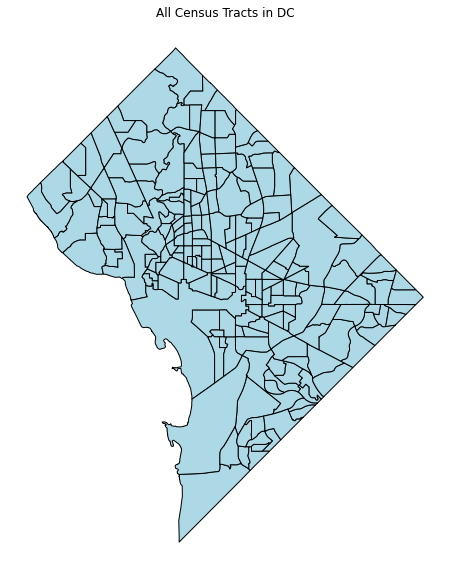

In [417]:
# Plot all the DC tracts
fig, ax = plt.subplots(figsize=(10,10))
tracts_gdf.plot(ax=ax, color='lightblue', edgecolor='black')

# Set plot title and remove axis
ax.set_title('All Census Tracts in DC')
ax.set_axis_off()

plt.show()

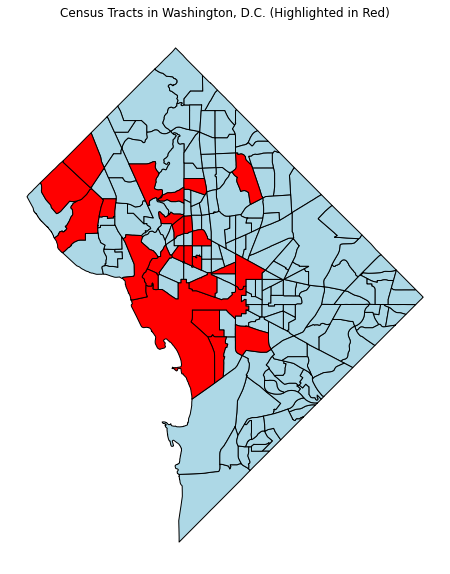

In [418]:
# Add a column to indicate whether a tract should be highlighted

# URL to the TIGER/Line shapefile for census tracts in Washington, D.C. for 2019
url = "https://www2.census.gov/geo/tiger/TIGER2019/TRACT/tl_2019_11_tract.zip"

# Load the shapefile directly from the URL
tracts_gdf = gpd.read_file(url)

EJI_values_not_in_SDI = [str(tract) for tract in EJI_values_not_in_SDI]

tracts_gdf['highlight'] = tracts_gdf['GEOID'].apply(lambda x: x in EJI_values_not_in_SDI)

# Ensure geometries are valid
tracts_gdf = tracts_gdf[tracts_gdf.is_valid]

# Drop rows with missing geometries
tracts_gdf = tracts_gdf.dropna(subset=['geometry'])

# Check for valid data before plotting
if not tracts_gdf.empty:
    fig, ax = plt.subplots(figsize=(10, 10))
    
    # Plot non-highlighted tracts in light blue
    tracts_gdf[tracts_gdf['highlight'] == False].plot(ax=ax,
                                                       color='lightblue', edgecolor='black')
    
    # Plot highlighted tracts in red
    if not tracts_gdf[tracts_gdf['highlight'] == True].empty:
        tracts_gdf[tracts_gdf['highlight'] == True].plot(ax=ax, 
                                                         color='red',edgecolor='black')

    # Set the plot title and remove axis
    ax.set_title('Census Tracts in Washington, D.C. (Highlighted in Red)')
    ax.set_axis_off()

    # Show the plot
    plt.show()
else:
    print("No valid tracts found to plot")

In [419]:
tracts_gdf['highlight']

0      False
1      False
2      False
3      False
4      False
       ...  
174    False
175    False
176    False
177    False
178    False
Name: highlight, Length: 179, dtype: bool

Tract 11001001302: Centroid at POINT (-77.05606779961383 38.94113909988024)
Tract 11001005500: Centroid at POINT (-77.0492454592776 38.9076298996707)
Tract 11001000801: Centroid at POINT (-77.09091774144648 38.92439021100293)
Tract 11001010200: Centroid at POINT (-77.02369605412477 38.88244453386747)
Tract 11001011000: Centroid at POINT (-77.01800354258424 38.86880476116527)
Tract 11001009501: Centroid at POINT (-77.00295249960372 38.941843101229324)
Tract 11001002502: Centroid at POINT (-77.03014484285316 38.93905730503721)
Tract 11001007200: Centroid at POINT (-77.00080180755306 38.87504093846648)
Tract 11001002701: Centroid at POINT (-77.04168564012429 38.93445024461379)
Tract 11001003700: Centroid at POINT (-77.03433303357372 38.92286146650908)
Tract 11001003800: Centroid at POINT (-77.03917939816792 38.921634816493366)
Tract 11001004400: Centroid at POINT (-77.02759271377217 38.9170143156513)
Tract 11001000701: Centroid at POINT (-77.07666133148422 38.92954982310764)
Tract 1100100

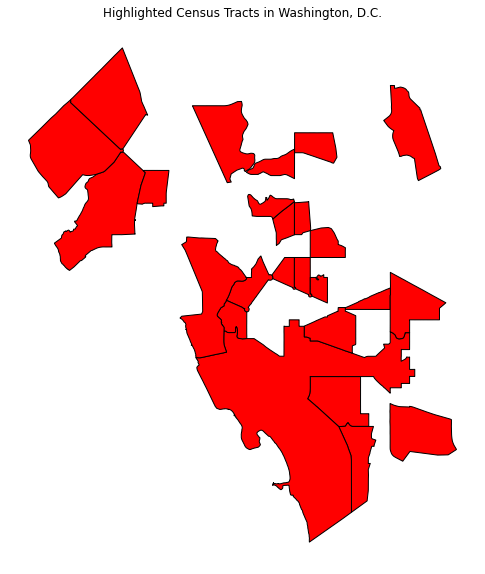

In [420]:
# Just focus on the highlighted tracts (the 25)
# URL to the TIGER/Line shapefile for census tracts in Washington, D.C. for 2019
url = "https://www2.census.gov/geo/tiger/TIGER2019/TRACT/tl_2019_11_tract.zip"

# Load the shapefile directly from the URL
tracts_gdf = gpd.read_file(url)

# Convert values_in_first_not_in_second to strings
EJI_values_not_in_SDI = [str(tract) for tract in EJI_values_not_in_SDI]

# Add a column to indicate whether a tract should be highlighted
tracts_gdf['highlight'] = tracts_gdf['GEOID'].apply(lambda x: x in EJI_values_not_in_SDI)

# Ensure geometries are valid
tracts_gdf = tracts_gdf[tracts_gdf.is_valid]

# Drop rows with missing geometries
tracts_gdf = tracts_gdf.dropna(subset=['geometry'])

# Extract and print the neighborhood structure for each highlighted tract
highlighted_tracts = tracts_gdf[tracts_gdf['highlight'] == True]

if not highlighted_tracts.empty:
    for _, row in highlighted_tracts.iterrows():
        tract_id = row['GEOID']
        centroid = row['geometry'].centroid
        print(f"Tract {tract_id}: Centroid at {centroid}")
        # Add more descriptive analysis or neighborhood lookup if possible

    # Plot the tracts
    fig, ax = plt.subplots(figsize=(10, 10))
    highlighted_tracts.plot(ax=ax, color='red', edgecolor='black')
    ax.set_title('Highlighted Census Tracts in Washington, D.C.')
    ax.set_axis_off()
    plt.show()
else:
    print("No valid tracts found for plotting.")

In [421]:
# Create dictionary to store neighbors of each tract
neighbors_dict ={}

# Iterate through each tract in the list
for tract_id in EJI_values_not_in_SDI:
    # Get the geometry of the current tract
    current_tract = tracts_gdf[tracts_gdf['GEOID'] == tract_id]
    if not current_tract.empty:
        # Find tracts that touch current one
        neighbors = tracts_gdf[tracts_gdf.geometry.touches(current_tract.
                                                           geometry.values[0])]
        # Exclude the current tract from neighbors list
        neighbors = neighbors[neighbors['GEOID'] != tract_id]

        # Store the neighbors in the dictionary
        neighbors_dict[tract_id] = neighbors['GEOID'].tolist()

# Print the neighbors for each tract
for tract, neighbors in neighbors_dict.items():
    print(f"Tract {tract} has the following neighbors: {', '.join(neighbors)}")

Tract 11001000100 has the following neighbors: 11001005500, 11001000400, 11001005600, 11001000501, 11001006202, 11001000202, 11001004100
Tract 11001000701 has the following neighbors: 11001000801, 11001000400, 11001000600, 11001000702, 11001001002
Tract 11001000801 has the following neighbors: 11001000902, 11001000300, 11001000701, 11001000702, 11001000901, 11001000802, 11001001002
Tract 11001000901 has the following neighbors: 11001000902, 11001000801, 11001001001, 11001001002
Tract 11001001001 has the following neighbors: 11001000901, 11001001002, 11001001100, 11001001200
Tract 11001001302 has the following neighbors: 11001000502, 11001000600, 11001002702, 11001000501, 11001001301, 11001002600, 11001001200
Tract 11001002502 has the following neighbors: 11001002501, 11001002400, 11001002701, 11001002801, 11001002600, 11001002900, 11001003100, 11001003200
Tract 11001002701 has the following neighbors: 11001002502, 11001002801, 11001002802, 11001002702, 11001002600
Tract 11001003700 has

In [422]:
col_list = merged_df.columns
print(len(col_list))

SDI_columns = col_list[112:128]
print(SDI_columns)
print(len(SDI_columns))

128
Index(['SDI_score', 'PovertyLT100_FPL_score', 'Single_Parent_Fam_score',
       'Education_LT12years_score', 'HHNo_Vehicle_score',
       'HHRenter_Occupied_score', 'HHCrowding_score', 'Nonemployed_score',
       'sdi', 'pct_Poverty_LT100', 'pct_Single_Parent_Fam',
       'pct_Education_LT12years', 'pct_NonEmployed', 'pctHH_No_Vehicle',
       'pctHH_Renter_Occupied', 'pctHH_Crowding'],
      dtype='object')
16


In [423]:
# Pull from neighbors_dict and iterate through SDI columns to fill in values

# Iterate through neighbros_dct
for tract, neighbors in neighbors_dict.items():
    # Find row of current tract
    tract_row = merged_df[merged_df['GEOID'] == tract]

    # Make sure == tract
    if not tract_row.empty:

        # Iterate through SDI columns
        for column in SDI_columns:
                # Pull values of those neighbors 
                neighbor_values = merged_df.loc[merged_df['GEOID'].isin(neighbors), column]
                # Calculate mean of the neighbors (if not null neighbors)
                filled_value = neighbor_values.mean() if not neighbor_values.isnull().all() else None
                # Fill in the value!
                merged_df.loc[merged_df['GEOID'] == tract, column] = filled_value

In [424]:
print(merged_df.shape)
print(merged_df.columns)

print(merged_df)

(71677, 128)
Index(['STATEFP', 'COUNTYFP', 'TRACTCE', 'AFFGEOID', 'GEOID', 'NAME', 'COUNTY',
       'StateAbbr', 'StateDesc', 'Location',
       ...
       'HHCrowding_score', 'Nonemployed_score', 'sdi', 'pct_Poverty_LT100',
       'pct_Single_Parent_Fam', 'pct_Education_LT12years', 'pct_NonEmployed',
       'pctHH_No_Vehicle', 'pctHH_Renter_Occupied', 'pctHH_Crowding'],
      dtype='object', length=128)
       STATEFP  COUNTYFP  TRACTCE              AFFGEOID        GEOID     NAME  \
0            1         1    20100  1400000US01001020100   1001020100   201.00   
1            1         1    20200  1400000US01001020200   1001020200   202.00   
2            1         1    20300  1400000US01001020300   1001020300   203.00   
3            1         1    20400  1400000US01001020400   1001020400   204.00   
4            1         1    20500  1400000US01001020500   1001020500   205.00   
...        ...       ...      ...                   ...          ...      ...   
71672       56        43 

In [425]:
# Check for missing values in the entire dataset
missing_after_impute = merged_df.isnull().sum()

# Display columns with missing values
print("columns with missing values:\n",missing_after_impute[missing_after_impute > 0], "\n")

columns with missing values:
 Series([], dtype: int64) 



In [426]:
summary_df = merged_df.describe().transpose()
summary_df

# Save as CSV if needed
#merged_df.to_csv('merged_df.csv', index=False)

,count,mean,std,min,25%,50%,75%,max
STATEFP,71677.0,27.854654,15.775001,1.0,12.000000,27.000000,41.000000,56.00000
COUNTYFP,71677.0,86.315652,99.719937,1.0,31.000000,63.000000,109.000000,840.00000
TRACTCE,71677.0,253687.867447,344754.468181,100.0,10302.000000,44104.000000,451700.000000,988300.00000
NAME,71677.0,2536.878674,3447.544682,1.0,103.020000,441.040000,4517.000000,9883.00000
E_TOTPOP,71677.0,4493.524841,2316.129938,9.0,2955.000000,4154.000000,5582.000000,72041.00000
...,...,...,...,...,...,...,...,...
pct_Education_LT12years,71677.0,0.126689,0.103090,0.0,0.052632,0.098112,0.171188,1.00000
pct_NonEmployed,71677.0,0.439267,1.209494,0.0,0.280655,0.363337,0.486434,145.39131
pctHH_No_Vehicle,71677.0,0.092789,0.121863,0.0,0.023879,0.052244,0.108295,1.00000
pctHH_Renter_Occupied,71677.0,0.365552,0.229171,0.0,0.183623,0.315177,0.511965,1.00000


In [427]:
#merged_df.drop(["F_HVM", "RPL_HVM", "SPL_EJI","RPL_EJI"], axis=1, inplace=True)

# NEURAL NETWORK ANALYSIS

### Prep for analysis

In [428]:
# df_columns = merged_df.columns
# print(df_columns[10:])
# columns = merged_df.columns
# print(columns[12:])

column = merged_df.columns
print(column[10:])

Index(['E_TOTPOP', 'M_TOTPOP', 'E_DAYPOP', 'SPL_SER', 'RPL_SER', 'EPL_OZONE',
       'EPL_PM', 'EPL_DSLPM', 'EPL_TOTCR', 'SPL_EBM_THEME1',
       ...
       'HHCrowding_score', 'Nonemployed_score', 'sdi', 'pct_Poverty_LT100',
       'pct_Single_Parent_Fam', 'pct_Education_LT12years', 'pct_NonEmployed',
       'pctHH_No_Vehicle', 'pctHH_Renter_Occupied', 'pctHH_Crowding'],
      dtype='object', length=118)


In [429]:
# Numeriv variables using to predict ... 
v_df = merged_df.iloc[:, 10:]
print(v_df)

# var_df = merged_df.iloc[:, 12:]
# print(var_df)

       E_TOTPOP  M_TOTPOP  E_DAYPOP  SPL_SER  RPL_SER  EPL_OZONE  EPL_PM  \
0        1993.0     225.0    1018.0   0.9229   0.4543        0.0  0.8503   
1        1959.0     202.0    3835.0   1.1108   0.6027        0.0  0.8627   
2        3507.0     386.0    1836.0   1.0226   0.5362        0.0  0.8694   
3        3878.0     317.0    1951.0   0.7659   0.3290        0.0  0.8787   
4       10596.0     707.0    8342.0   0.9289   0.4591        0.0  0.8849   
...         ...       ...       ...      ...      ...        ...     ...   
71672    3051.0     165.0    1774.0   0.6739   0.2606        0.0  0.0007   
71673    2482.0     219.0    2852.0   0.8940   0.4306        0.0  0.0038   
71674    2494.0     211.0    3233.0   0.8492   0.3945        0.0  0.0041   
71675    3294.0     290.0    1933.0   0.9359   0.4651        0.0  0.0012   
71676    3755.0     290.0    3643.0   0.8293   0.3783        0.0  0.0016   

       EPL_DSLPM  EPL_TOTCR  SPL_EBM_THEME1  ...  HHCrowding_score  \
0         0.3242 

In [430]:
# # print(var_df.columns.to_list())
# # print(var_df.head(7))
# has_nans = var_df.isnull().values.any()
# print(has_nans)  # Output: True

# nan_counts = var_df.isnull().sum()
# print("\n", nan_counts)

# # Filter rows that have NaNs
# rows_with_nans = var_df[var_df.isnull().any(axis=1)]
# print("\n",rows_with_nans)

var_df = v_df.dropna()

has_nans = var_df.isnull().values.any()
print(has_nans)  # Output: True


False


In [431]:
# Input layer - covariates (independent variables)
    # each neruon corresponds to 1 input feature
'''EP_ASTHMA is not in our dataset, just F_ASTHMA'''
X = var_df.drop('F_ASTHMA', axis=1) 

#y = var_df['F_ASTHMA']
y = (var_df['F_ASTHMA'] > 0).astype(int)

print(X.shape)
print(len(y))

(71677, 117)
71677


## PCA analysis

In [432]:
# Train test split the data
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, f_classif


In [433]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Feature Selection (PCA or SelectKBest)
# PCA Example
pca = PCA(n_components=20)  # Choose number of components originally 12 but now its 20
X_reduced = pca.fit_transform(X_scaled)


In [434]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score
# Alternatively, SelectKBest
#selector = SelectKBest(f_classif, k=10)  # Choose top 10 features
# X_reduced = selector.fit_transform(X_scaled, y)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.2, random_state=42)

# Neural Network Model
nn_model = MLPClassifier(
    hidden_layer_sizes=(100, 50),
    activation='relu',
    solver='adam',
    alpha=0.01,  # Regularization parameter -------edited this from 0.001
    max_iter=200,
    random_state=42,
    early_stopping=True,
    validation_fraction=0.2
)

In [435]:
# print(y_train.head())
# print(y_train.dtype)

In [436]:
# Train the model
nn_model.fit(X_train, y_train)

# Predictions
y_pred = nn_model.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.8770228794642857
              precision    recall  f1-score   support

           0       0.90      0.92      0.91      9643
           1       0.83      0.79      0.81      4693

    accuracy                           0.88     14336
   macro avg       0.86      0.85      0.86     14336
weighted avg       0.88      0.88      0.88     14336



In [437]:

numeric_features = X.select_dtypes(include=['float64', 'int64']).columns

# Get the PCA components (loadings)
loadings = pd.DataFrame(pca.components_, columns= numeric_features)

# Take absolute values for ranking features by importance
feature_importance = loadings.abs().sum(axis=0).sort_values(ascending=False)

# Select the top 25 features
top_25_features = feature_importance.head(25)
print("Top 25 features contributing to PCA:")
print(top_25_features)


Top 25 features contributing to PCA:
EPL_NPL           2.170952
EPL_ROAD          2.155624
EPL_RMP           2.122454
EPL_AIRPRT        2.087899
E_ROAD            2.059918
EPL_COAL          2.059128
E_NPL             2.056015
E_COAL            2.046569
EPL_GROUPQ        2.012634
EPL_TSD           2.003090
E_RMP             1.990993
E_TSD             1.981010
E_AIRPRT          1.919594
SPL_SVM_DOM4      1.860277
EP_AGE17          1.855720
E_TOTPOP          1.847681
RPL_SVM_DOM4      1.847171
EPL_AGE17         1.793182
SPL_EBM_THEME3    1.747131
EPL_HOUAGE        1.745107
E_HOUAGE          1.717385
RPL_EBM_DOM3      1.707765
EP_GROUPQ         1.696324
E_OZONE           1.681320
EPL_LEAD          1.676402
dtype: float64


## Figures for PCA

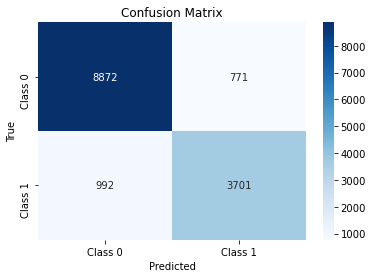

In [438]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()


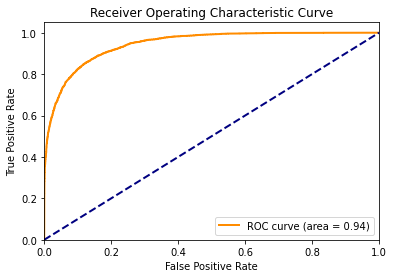

In [439]:
from sklearn.metrics import roc_curve, auc
'''ROC Curve (Receiver Operating Characteristic Curve)'''

fpr, tpr, _ = roc_curve(y_test, nn_model.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend(loc="lower right")
plt.show()


In [447]:
from scipy.stats import skew, kurtosis
import pandas as pd

# Assuming X is your feature dataset
numeric_features = X.select_dtypes(include=['float64', 'int64'])  # Only numeric features
skewness = numeric_features.apply(skew)  # Compute skewness for each feature
kurtosis_values = numeric_features.apply(kurtosis)  # Compute kurtosis for each feature

# Combine into a DataFrame for easier interpretation
distribution_stats = pd.DataFrame({
    'Feature': numeric_features.columns,
    'Skewness': skewness,
    'Kurtosis': kurtosis_values
}).sort_values(by='Skewness', ascending=False)

# Display the top skewed/kurtotic features
print("Skewness and Kurtosis of Features:")
print(distribution_stats)


Skewness and Kurtosis of Features:
                         Feature   Skewness     Kurtosis
pct_NonEmployed  pct_NonEmployed  78.148941  7612.660073
E_LEAD                    E_LEAD  57.060867  3721.415490
E_TOTCR                  E_TOTCR  32.079071  2830.857326
E_COAL                    E_COAL  23.679421   678.380094
EPL_LEAD                EPL_LEAD  15.082377   225.478463
...                          ...        ...          ...
E_PARK                    E_PARK  -0.384302    -1.615269
EPL_RAIL                EPL_RAIL  -0.394453    -1.298762
E_HOUAGE                E_HOUAGE  -0.402889    -0.865429
EPL_ROAD                EPL_ROAD  -0.431396    -1.149474
SPL_SVM_DOM3        SPL_SVM_DOM3  -0.465239     0.793955

[117 rows x 3 columns]


## MLPClassifier for Neural Networks

In [440]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)

In [441]:
# # Feature Selection (SelectKBest)
# from sklearn.feature_selection import SelectKBest, f_classif

# # Select top 10 features based on F-statistic
# selector = SelectKBest(f_classif, k=12)  
# X_reduced = selector.fit_transform(X_scaled, y)

# # Train-test split the data
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.2, random_state=42)

# # Neural Network Model
# from sklearn.neural_network import MLPClassifier
# from sklearn.metrics import classification_report, accuracy_score

# nn_model = MLPClassifier(
#     hidden_layer_sizes=(100, 50),  # Two hidden layers: 100 and 50 neurons
#     activation='relu',             # ReLU activation for hidden layers
#     solver='adam',                 # Adam optimizer
#     alpha=0.02,                    # L2 regularization strength -------edited this from 0.02
#     max_iter=200,                  # Max iterations for convergence
#     random_state=42               # For reproducibility
#     # early_stopping=True,           # Stop early if validation score stops improving
#     # validation_fraction=0.2        # Fraction of training data for validation
# )

# # Train the model
# nn_model.fit(X_train, y_train)

# # Predictions
# y_pred = nn_model.predict(X_test)

# # Evaluation
# print("Accuracy:", accuracy_score(y_test, y_pred))
# print(classification_report(y_test, y_pred))


In [442]:
# # Get the boolean mask of selected features
# selected_mask = selector.get_support()

# # Get the names of the selected features
# selected_features = X.columns[selected_mask]
# print("Top 12 Selected Features:")
# print(selected_features)

In [443]:
# # Get the F-statistic scores for all features
# feature_scores = selector.scores_

# # Create a DataFrame for better visualization
# import pandas as pd
# feature_scores_df = pd.DataFrame({
#     'Feature': X.columns,
#     'F-Score': feature_scores
# })

# # Sort by F-score in descending order
# top_features = feature_scores_df.sort_values(by='F-Score', ascending=False).head(12)
# print("Top 10 Features with F-Scores:")
# print(top_features)


## Figures

In [444]:
# '''Confusion Matrix'''
# import seaborn as sns
# import matplotlib.pyplot as plt
# from sklearn.metrics import confusion_matrix

# cm = confusion_matrix(y_test, y_pred)
# sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
# plt.xlabel("Predicted")
# plt.ylabel("True")
# plt.title("Confusion Matrix of F_ASTHMA")
# plt.show()

In [445]:
# '''ROC Curve'''
# from sklearn.metrics import roc_curve, auc

# fpr, tpr, _ = roc_curve(y_test, nn_model.predict_proba(X_test)[:, 1])
# roc_auc = auc(fpr, tpr)

# plt.figure()
# plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
# plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate (Recall)')
# plt.title('Receiver Operating Characteristic Curve')
# plt.legend(loc="lower right")
# plt.show()


In [446]:
# '''Prediction versus True Labels Plot'''
# plt.scatter(range(len(y_test)), y_pred, label="Predictions", color="blue", alpha=0.5)
# plt.scatter(range(len(y_test)), y_test, label="True Labels", color="red", alpha=0.5)
# plt.xlabel("Sample Index")
# plt.ylabel("Class Label (0 or 1)")
# plt.legend()
# plt.title("Predictions vs True Labels")
# plt.show()
